## Official Website -> [quick_ml](http://www.antoreepjana.wixsite.com/quick-ml)

### Installation & Imports

In [1]:
!pip install -q quick-ml

In [2]:
import tensorflow as tf
import quick_ml

print("quick_ml version -> ", quick_ml.__version__)

Tensorflow imported successfully. Tensorflow version -> 2.4.0
quick_ml version ->  1.3.4


### Get TPU Strategy & Load the datasets

In [3]:
from quick_ml.begin_tpu import define_tpu_strategy, get_training_dataset, get_validation_dataset, get_test_dataset

In [4]:
strategy, tpu = define_tpu_strategy()

Running on TPU  grpc://10.0.0.2:8470
Mixed precision disabled
Accelerated Linear Algebra disabled


### Define the Parameters

In [5]:
from kaggle_datasets import KaggleDatasets
GCS_DS_PATH = KaggleDatasets().get_gcs_path('cats-dogs-tfrecords-192x192')

print(GCS_DS_PATH)

train_tfrec_path = '/train.tfrecords'
val_tfrec_path = '/val.tfrecords'

BATCH_SIZE = 16 * strategy.num_replicas_in_sync

EPOCHS = 5
STEPS_PER_EPOCH = 14961 // BATCH_SIZE
print("STEPS PER EPOCH -> ", STEPS_PER_EPOCH)

dictionary_labeled = "{'image_raw' : tf.io.FixedLenFeature([], tf.string), 'label' : tf.io.FixedLenFeature([], tf.int64)}"
IMAGE_SIZE = "192,192"

from quick_ml.begin_tpu import get_labeled_tfrecord_format
get_labeled_tfrecord_format(dictionary_labeled, IMAGE_SIZE)

gs://kds-ec678ce6d4723d283063f8ac712e23147daa26a5df069b0723536805
STEPS PER EPOCH ->  116


## Single Model Training

In [6]:
from quick_ml.load_models_quick import create_model

In [7]:
with strategy.scope():
    model = create_model(1, model_name = 'EfficientNetB1', classification_model = 'default', freeze = False, 
                        input_shape =[192,192,3], activation = 'sigmoid', weights = 'imagenet', optimizer= 'rmsprop',
                        loss = 'binary_crossentropy', metrics = 'accuracy')
    

27164672/27164032 [==============================] - 1s 0us/step


### Define the augmentations

In [8]:
from quick_ml.augments import augment_and_train

In [9]:
from quick_ml.augments import define_augmentations

In [10]:
define_augmentations(flip_left_right = True, hue = 0.2, contrast = (0.1,0.4), brightness = 0.3)

Defined augmentes -> 
 {'flip_left_right': True, 'random_hue': 0.2, 'random_contrast': (0.1, 0.4), 'brightness': 0.3} 



### Define Callbacks (for Training w/ Augmentation)

##### Please Note :- Callbacks for Training with Augmentation need to be by defined by the following method. Callbacks without augmentation need to be called by using the quick_ml.callbacks. See Here -> [Model Training w/ Callbacks](https://www.kaggle.com/superficiallybot/quick-ml-model-training-w-callbacks) 

In [11]:
from quick_ml.augments import define_callbacks

define_callbacks(lr_scheduler = 'rampup')

### Augment & Train w/o Plot

In [12]:
augment_and_train(model, GCS_DS_PATH, train_tfrec_path, val_tfrec_path, BATCH_SIZE, EPOCHS, STEPS_PER_EPOCH, plot = False)


Epoch # 1


Current Learning Rate -> 0.0010000000474974513
116/116 [==============================] - 52s 144ms/step - loss: 0.7814 - accuracy: 0.4899 - val_loss: 0.6931 - val_accuracy: 0.4898
Learning Rate changed to 8.800000068731606e-05

Epoch # 2


Current Learning Rate -> 8.800000068731606e-05
116/116 [==============================] - 11s 87ms/step - loss: 0.6938 - accuracy: 0.5178 - val_loss: 0.6939 - val_accuracy: 0.4898
Learning Rate changed to 0.00016599999798927456

Epoch # 3


Current Learning Rate -> 0.00016599999798927456
116/116 [==============================] - 11s 87ms/step - loss: 0.6871 - accuracy: 0.5507 - val_loss: 0.6728 - val_accuracy: 0.5809
Learning Rate changed to 0.00024399999529123306

Epoch # 4


Current Learning Rate -> 0.00024399999529123306
116/116 [==============================] - 11s 89ms/step - loss: 0.6741 - accuracy: 0.5911 - val_loss: 0.6877 - val_accuracy: 0.5597
Learning Rate changed to 0.0003220000071451068

Epoch # 5


Current Learning Rate 

### Augment & Train w/ Plot

In [13]:
with strategy.scope():
    model = create_model(1, model_name = 'EfficientNetB1', classification_model = 'default', freeze = False, 
                        input_shape =[192,192,3], activation = 'sigmoid', weights = 'imagenet', optimizer= 'rmsprop',
                        loss = 'binary_crossentropy', metrics = 'accuracy')


Epoch # 1


Current Learning Rate -> 0.0010000000474974513
116/116 [==============================] - 52s 146ms/step - loss: 4.9322 - accuracy: 0.5038 - val_loss: 0.6932 - val_accuracy: 0.4898
Learning Rate changed to 8.800000068731606e-05

Epoch # 2


Current Learning Rate -> 8.800000068731606e-05
116/116 [==============================] - 11s 86ms/step - loss: 0.6950 - accuracy: 0.5126 - val_loss: 0.6927 - val_accuracy: 0.5102
Learning Rate changed to 0.00016599999798927456

Epoch # 3


Current Learning Rate -> 0.00016599999798927456
116/116 [==============================] - 11s 86ms/step - loss: 0.6975 - accuracy: 0.5065 - val_loss: 0.6928 - val_accuracy: 0.5102
Learning Rate changed to 0.00024399999529123306

Epoch # 4


Current Learning Rate -> 0.00024399999529123306
116/116 [==============================] - 11s 87ms/step - loss: 0.7203 - accuracy: 0.5037 - val_loss: 0.6935 - val_accuracy: 0.4898
Learning Rate changed to 0.0003220000071451068

Epoch # 5


Current Learning Rate 

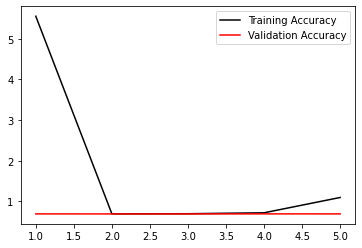

In [14]:
augment_and_train(model, GCS_DS_PATH, train_tfrec_path, val_tfrec_path, BATCH_SIZE, EPOCHS, STEPS_PER_EPOCH, plot = True)